In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [5]:
data=pd.read_csv('/content/drive/MyDrive/CSE4238/Matrix_Factorization_Assignment.csv')
data.head()

,Index,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,...,4960,4961,4962,4963,4964,4965,4966,4967,4968,4969,4970,4971,4972,4973,4974,4975,4976,4977,4978,4979,4980,4981,4982,4983,4984,4985,4986,4987,4988,4989,4990,4991,4992,4993,4994,4995,4996,4997,4998,4999
0,11071,1.0,7.0,1.0,9.0,6.0,6.0,8.0,NaN,NaN,10.0,NaN,NaN,NaN,4.0,6.0,10.0,0.0,NaN,5.0,NaN,1.0,NaN,NaN,NaN,8.0,NaN,2.0,NaN,NaN,5.0,1.0,9.0,NaN,NaN,NaN,6.0,3.0,NaN,0.0,...,1.0,7.0,10.0,NaN,NaN,4.0,5.0,NaN,7.0,6.0,7.0,10.0,8.0,7.0,NaN,NaN,1.0,9.0,NaN,NaN,9.0,NaN,NaN,7.0,1.0,9.0,10.0,1.0,1.0,NaN,2.0,NaN,7.0,9.0,6.0,10.0,7.0,NaN,NaN,NaN
1,19900,NaN,3.0,3.0,6.0,NaN,3.0,5.0,7.0,9.0,NaN,0.0,8.0,NaN,8.0,NaN,5.0,2.0,NaN,2.0,7.0,NaN,8.0,2.0,3.0,6.0,0.0,NaN,1.0,NaN,NaN,NaN,NaN,NaN,2.0,9.0,6.0,NaN,9.0,NaN,...,9.0,NaN,9.0,NaN,NaN,NaN,6.0,0.0,0.0,7.0,0.0,8.0,10.0,0.0,NaN,2.0,0.0,NaN,NaN,8.0,NaN,NaN,NaN,7.0,9.0,6.0,NaN,NaN,7.0,6.0,NaN,NaN,NaN,5.0,9.0,3.0,0.0,NaN,9.0,2.0
2,25325,5.0,7.0,NaN,9.0,5.0,6.0,5.0,0.0,NaN,10.0,7.0,NaN,NaN,0.0,9.0,4.0,4.0,3.0,NaN,1.0,0.0,NaN,4.0,1.0,NaN,NaN,9.0,7.0,NaN,6.0,NaN,6.0,1.0,NaN,6.0,6.0,NaN,0.0,NaN,...,NaN,6.0,2.0,10.0,NaN,NaN,9.0,NaN,2.0,2.0,NaN,9.0,NaN,NaN,1.0,NaN,9.0,2.0,9.0,1.0,NaN,NaN,2.0,8.0,6.0,NaN,NaN,NaN,NaN,NaN,NaN,9.0,10.0,NaN,NaN,9.0,0.0,NaN,NaN,7.0
3,31006,3.0,4.0,1.0,NaN,5.0,NaN,10.0,NaN,8.0,0.0,NaN,NaN,4.0,1.0,5.0,NaN,3.0,5.0,4.0,3.0,5.0,8.0,7.0,NaN,10.0,6.0,8.0,5.0,NaN,8.0,NaN,4.0,NaN,NaN,7.0,3.0,NaN,NaN,NaN,...,10.0,8.0,0.0,NaN,9.0,NaN,NaN,NaN,2.0,2.0,5.0,NaN,NaN,2.0,7.0,NaN,2.0,NaN,2.0,1.0,4.0,4.0,NaN,NaN,4.0,NaN,NaN,NaN,NaN,6.0,3.0,2.0,1.0,3.0,NaN,NaN,2.0,NaN,4.0,2.0
4,37002,2.0,0.0,5.0,0.0,3.0,5.0,NaN,NaN,NaN,0.0,6.0,NaN,10.0,NaN,NaN,2.0,NaN,8.0,6.0,NaN,NaN,NaN,NaN,10.0,10.0,NaN,NaN,7.0,3.0,6.0,1.0,NaN,1.0,NaN,5.0,NaN,4.0,NaN,6.0,...,NaN,0.0,1.0,1.0,10.0,NaN,10.0,NaN,1.0,2.0,10.0,2.0,6.0,9.0,NaN,NaN,NaN,8.0,10.0,NaN,NaN,5.0,8.0,NaN,NaN,6.0,NaN,8.0,10.0,0.0,9.0,NaN,5.0,3.0,5.0,1.0,6.0,6.0,8.0,NaN


In [6]:
data.drop(data[data['Index']%311==0].index,inplace=True)


In [7]:
column=data.columns.to_list()

In [8]:
data.drop(columns=[ (col) for col in column if col.isdigit() and int(col)%311==0 and not int(col)==0],inplace=True)

In [9]:
data.head()

,Index,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,...,4959,4960,4961,4962,4963,4964,4965,4966,4967,4968,4969,4970,4971,4972,4973,4974,4975,4977,4978,4979,4980,4981,4982,4983,4984,4985,4986,4987,4988,4989,4990,4991,4992,4993,4994,4995,4996,4997,4998,4999
0,11071,1.0,7.0,1.0,9.0,6.0,6.0,8.0,NaN,NaN,10.0,NaN,NaN,NaN,4.0,6.0,10.0,0.0,NaN,5.0,NaN,1.0,NaN,NaN,NaN,8.0,NaN,2.0,NaN,NaN,5.0,1.0,9.0,NaN,NaN,NaN,6.0,3.0,NaN,0.0,...,NaN,1.0,7.0,10.0,NaN,NaN,4.0,5.0,NaN,7.0,6.0,7.0,10.0,8.0,7.0,NaN,NaN,9.0,NaN,NaN,9.0,NaN,NaN,7.0,1.0,9.0,10.0,1.0,1.0,NaN,2.0,NaN,7.0,9.0,6.0,10.0,7.0,NaN,NaN,NaN
1,19900,NaN,3.0,3.0,6.0,NaN,3.0,5.0,7.0,9.0,NaN,0.0,8.0,NaN,8.0,NaN,5.0,2.0,NaN,2.0,7.0,NaN,8.0,2.0,3.0,6.0,0.0,NaN,1.0,NaN,NaN,NaN,NaN,NaN,2.0,9.0,6.0,NaN,9.0,NaN,...,NaN,9.0,NaN,9.0,NaN,NaN,NaN,6.0,0.0,0.0,7.0,0.0,8.0,10.0,0.0,NaN,2.0,NaN,NaN,8.0,NaN,NaN,NaN,7.0,9.0,6.0,NaN,NaN,7.0,6.0,NaN,NaN,NaN,5.0,9.0,3.0,0.0,NaN,9.0,2.0
2,25325,5.0,7.0,NaN,9.0,5.0,6.0,5.0,0.0,NaN,10.0,7.0,NaN,NaN,0.0,9.0,4.0,4.0,3.0,NaN,1.0,0.0,NaN,4.0,1.0,NaN,NaN,9.0,7.0,NaN,6.0,NaN,6.0,1.0,NaN,6.0,6.0,NaN,0.0,NaN,...,NaN,NaN,6.0,2.0,10.0,NaN,NaN,9.0,NaN,2.0,2.0,NaN,9.0,NaN,NaN,1.0,NaN,2.0,9.0,1.0,NaN,NaN,2.0,8.0,6.0,NaN,NaN,NaN,NaN,NaN,NaN,9.0,10.0,NaN,NaN,9.0,0.0,NaN,NaN,7.0
3,31006,3.0,4.0,1.0,NaN,5.0,NaN,10.0,NaN,8.0,0.0,NaN,NaN,4.0,1.0,5.0,NaN,3.0,5.0,4.0,3.0,5.0,8.0,7.0,NaN,10.0,6.0,8.0,5.0,NaN,8.0,NaN,4.0,NaN,NaN,7.0,3.0,NaN,NaN,NaN,...,NaN,10.0,8.0,0.0,NaN,9.0,NaN,NaN,NaN,2.0,2.0,5.0,NaN,NaN,2.0,7.0,NaN,NaN,2.0,1.0,4.0,4.0,NaN,NaN,4.0,NaN,NaN,NaN,NaN,6.0,3.0,2.0,1.0,3.0,NaN,NaN,2.0,NaN,4.0,2.0
4,37002,2.0,0.0,5.0,0.0,3.0,5.0,NaN,NaN,NaN,0.0,6.0,NaN,10.0,NaN,NaN,2.0,NaN,8.0,6.0,NaN,NaN,NaN,NaN,10.0,10.0,NaN,NaN,7.0,3.0,6.0,1.0,NaN,1.0,NaN,5.0,NaN,4.0,NaN,6.0,...,5.0,NaN,0.0,1.0,1.0,10.0,NaN,10.0,NaN,1.0,2.0,10.0,2.0,6.0,9.0,NaN,NaN,8.0,10.0,NaN,NaN,5.0,8.0,NaN,NaN,6.0,NaN,8.0,10.0,0.0,9.0,NaN,5.0,3.0,5.0,1.0,6.0,6.0,8.0,NaN


In [10]:
data.shape

(44853, 4985)

In [11]:
data.fillna(data.mean(),inplace=True)

In [12]:
k=100
U=np.random.rand(44853, k)

In [15]:
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error
listt=[] 
scaler=StandardScaler()
U=scaler.fit_transform(U)

In [16]:
group_id=311
lamdaU=(0.00015 + 0.0001 * (group_id % 8))
lamdaV=(0.00025 - 0.0001 * (group_id % 7))

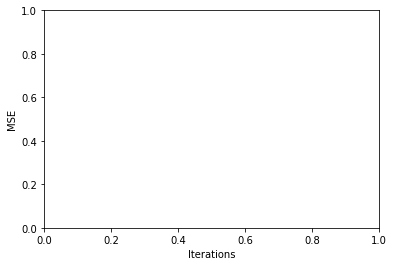

In [41]:
for i in range(800):
    V=np.dot(np.linalg.inv(np.dot(U.T,U)+lamdaU*np.identity(k)),(np.dot(data.T,U)).T)
    U=np.dot(np.linalg.inv(np.dot(V,V.T)+lamdaV*np.identity(k)),(np.dot(data,V.T)).T).T
    Xn=np.dot(U,V)
    mse = mean_squared_error(data, Xn)
    listt.append(mse)
    plt.xlabel('Iterations')
    plt.ylabel('MSE')

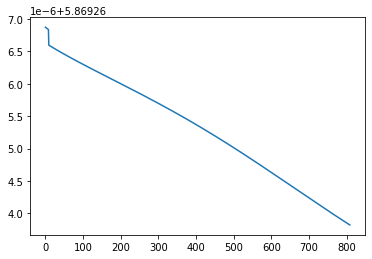

In [42]:
plt.plot(listt)

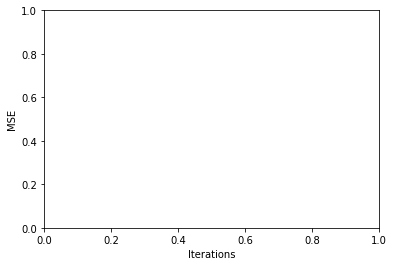

In [45]:
k=200
U=np.random.rand(44853, k)
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error
listt=[] 
scaler=StandardScaler()
U=scaler.fit_transform(U)
group_id=311
lamdaU=(0.00015 + 0.0001 * (group_id % 8))
lamdaV=(0.00025 - 0.0001 * (group_id % 7))
for i in range(10):
    V=np.dot(np.linalg.inv(np.dot(U.T,U)+lamdaU*np.identity(k)),(np.dot(data.T,U)).T)
    U=np.dot(np.linalg.inv(np.dot(V,V.T)+lamdaV*np.identity(k)),(np.dot(data,V.T)).T).T
    Xn=np.dot(U,V)
    mse = mean_squared_error(data, Xn)
    listt.append(mse)
    plt.xlabel('Iterations')
    plt.ylabel('MSE')

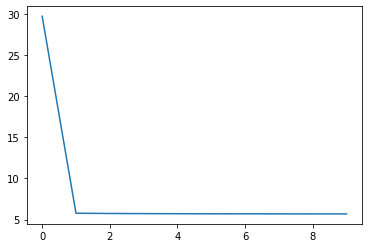

In [46]:
plt.plot(listt)

In [48]:
import seaborn as sns
from sklearn.metrics.pairwise import cosine_similarity

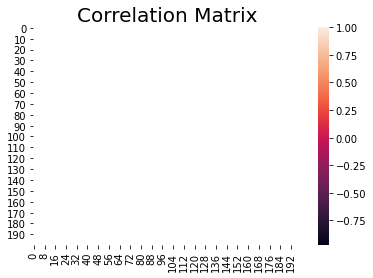

In [49]:
similaritiesU = cosine_similarity(U.T)
ax = sns.heatmap(similaritiesU, linewidth=0.5)
ax.set_title("Correlation Matrix", fontsize=20)
plt.show()

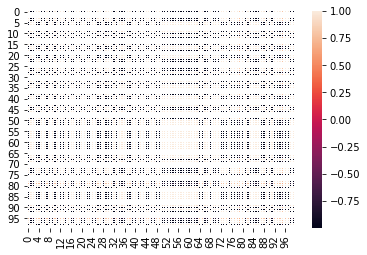

In [27]:
similaritiesV = cosine_similarity(V)
bx = sns.heatmap(similaritiesV, linewidth=0.5)
plt.show()

In [ ]:
np.save('/content/drive/MyDrive/CSE4238/U.npy', U)
np.save('/content/drive/MyDrive/CSE4238/V.npy', V)